In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import wget
url = "https://www.picostat.com/system/files/datasets/dataset-95529.csv"
wget.download(url)
weekly = pd.read_csv('dataset-95529.csv')

In [125]:
!curl -s -o dataset-95529.csv "https://www.picostat.com/system/files/datasets/dataset-95529.csv"

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
weekly = pd.read_csv('dataset-95529.csv')

In [127]:
#Structure of Data#
weekly.head()
print(weekly.head().to_latex(index=True))

\begin{tabular}{rrrrrrrrl}
\toprule
 Year &   Lag1 &   Lag2 &   Lag3 &   Lag4 &   Lag5 &    Volume &  Today & Direction \\
\midrule
 1990 &  0.816 &  1.572 & -3.936 & -0.229 & -3.484 &  0.154976 & -0.270 &      Down \\
 1990 & -0.270 &  0.816 &  1.572 & -3.936 & -0.229 &  0.148574 & -2.576 &      Down \\
 1990 & -2.576 & -0.270 &  0.816 &  1.572 & -3.936 &  0.159837 &  3.514 &        Up \\
 1990 &  3.514 & -2.576 & -0.270 &  0.816 &  1.572 &  0.161630 &  0.712 &        Up \\
 1990 &  0.712 &  3.514 & -2.576 & -0.270 &  0.816 &  0.153728 &  1.178 &        Up \\
\bottomrule
\end{tabular}



In [146]:
#Summary of Data#
weekly.describe()
print(weekly.describe())
print(weekly.describe().to_latex(index=True)) 

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

In [145]:
#Normaity test using pinguoin#
import pingouin as pg
print(pg.normality (weekly))
print(pg.normality (weekly).to_latex(index=True))

               W          pval  normal
Year    0.950223  9.951609e-19   False
Lag1    0.948756  5.232496e-19   False
Lag2    0.948813  5.364750e-19   False
Lag3    0.949282  6.578534e-19   False
Lag4    0.949279  6.570206e-19   False
Lag5    0.949428  7.011749e-19   False
Volume  0.787729  2.101803e-35   False
Today   0.948765  5.252924e-19   False
\begin{tabular}{lrrl}
\toprule
{} &         W &          pval &  normal \\
\midrule
Year   &  0.950223 &  9.951609e-19 &   False \\
Lag1   &  0.948756 &  5.232496e-19 &   False \\
Lag2   &  0.948813 &  5.364750e-19 &   False \\
Lag3   &  0.949282 &  6.578534e-19 &   False \\
Lag4   &  0.949279 &  6.570206e-19 &   False \\
Lag5   &  0.949428 &  7.011749e-19 &   False \\
Volume &  0.787729 &  2.101803e-35 &   False \\
Today  &  0.948765 &  5.252924e-19 &   False \\
\bottomrule
\end{tabular}



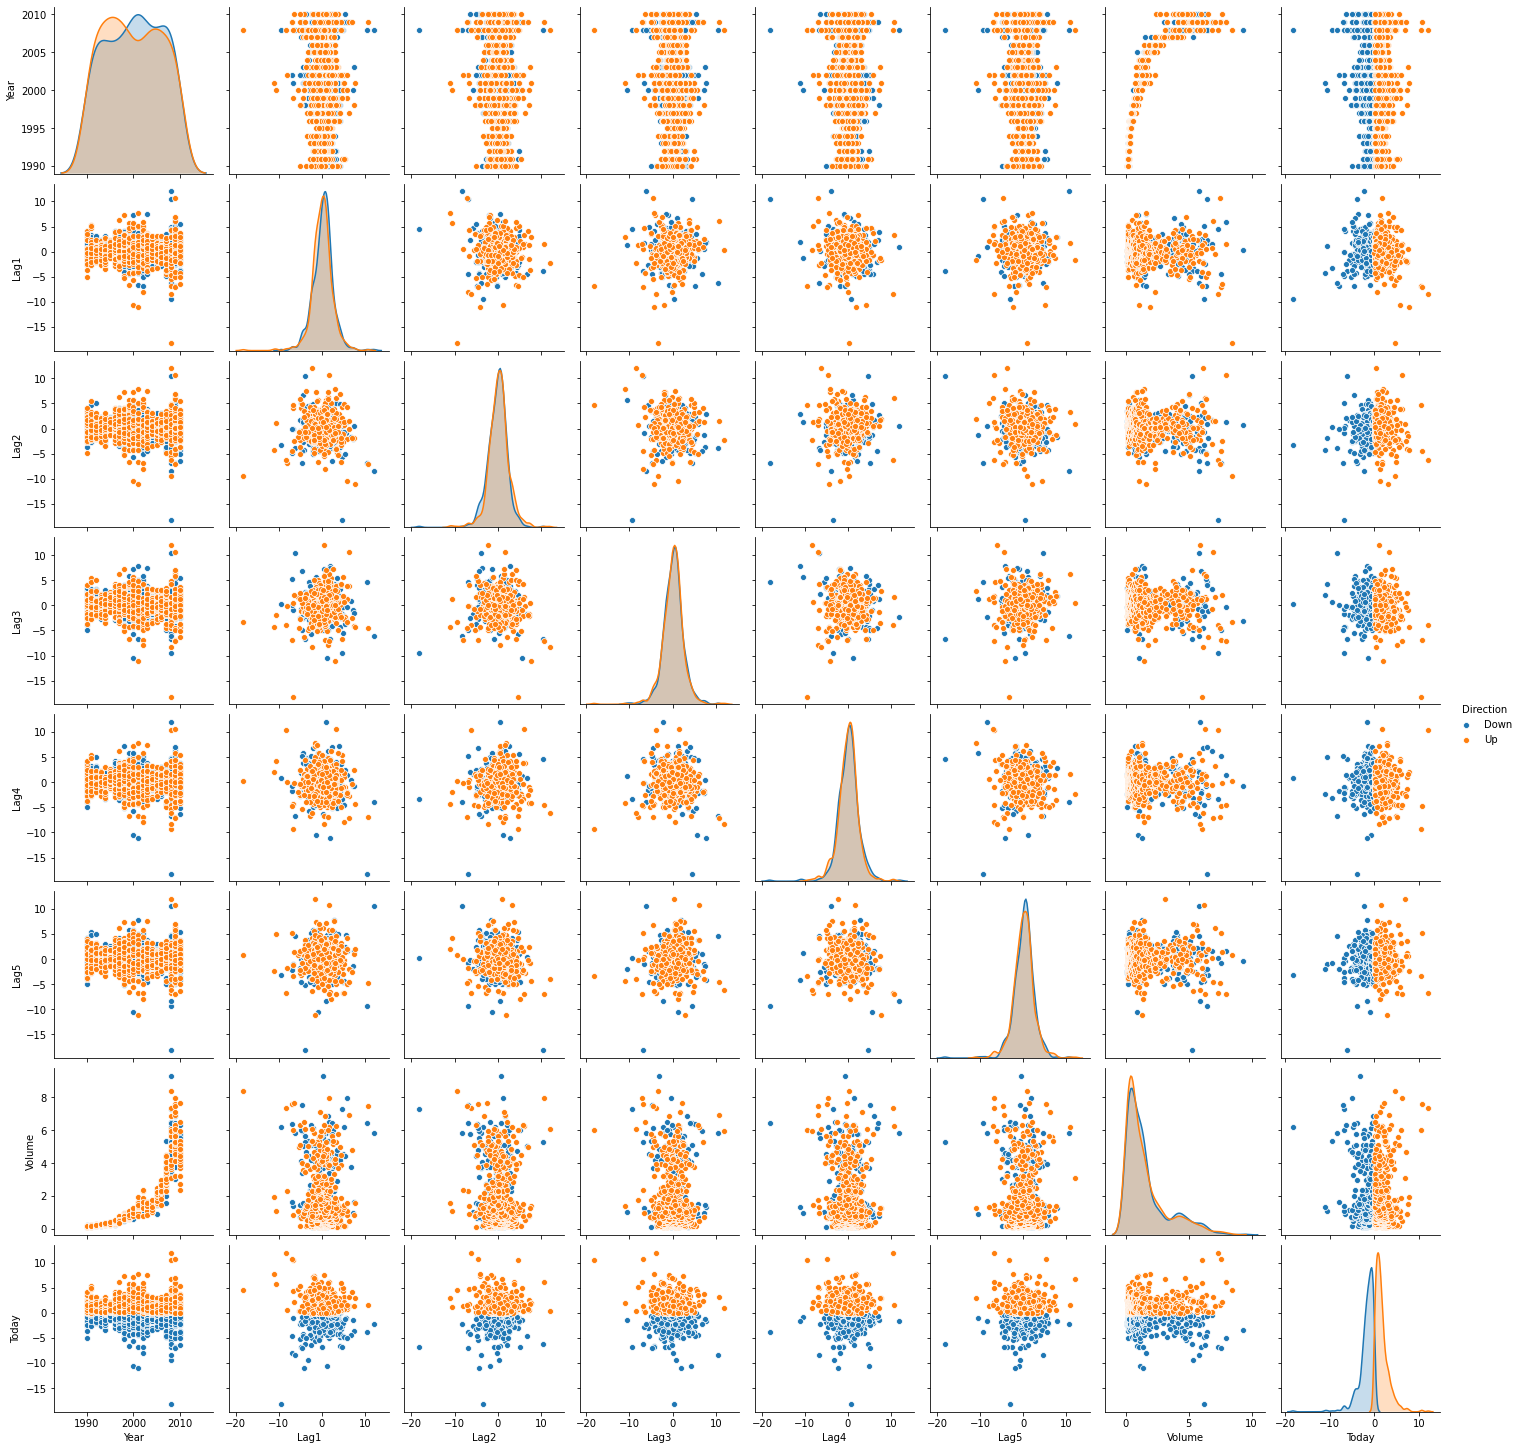

In [137]:
#All Plots#
import seaborn as sns
sns_plot = sns.pairplot(weekly, hue = "Direction");
sns_plot.savefig("graphical_summary_of_data.png")

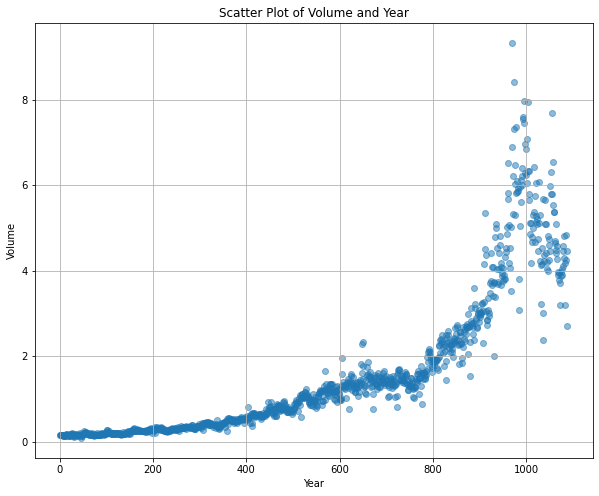

In [140]:
#Correlation Analysis#
fig = plt.figure(figsize = (10, 8))
ax = plt.axes()
ax.scatter(x = weekly.index, y = weekly["Volume"], alpha = 0.5)
ax.set(xlabel='Year', ylabel='Volume', title='Scatter Plot of Volume and Year')
ax.grid()
fig.savefig("graphical_correlation_analysis.png")
plt.show()

In [144]:
#Pearson Correlation using pinguoin#
pg.corr(weekly["Year"], weekly["Volume"])
print(pg.corr(weekly["Year"], weekly["Volume"]).to_latex(index=True))

\begin{tabular}{lrrlrrrlr}
\toprule
{} &     n &         r &         CI95\% &        r2 &   adj\_r2 &          p-val &        BF10 &  power \\
\midrule
pearson &  1089 &  0.841942 &  [0.82, 0.86] &  0.708866 &  0.70833 &  1.559688e-293 &  2.042e+289 &    1.0 \\
\bottomrule
\end{tabular}



In [34]:
#Data Changes#
endog = (weekly["Direction"] == "Up").astype("int64")
exog = sm.add_constant(weekly.drop(columns = ["Direction", "Year", "Today"]))

##FULL PREDICTORS MODEL##

In [148]:
#Full model Logistic Regression using pinguoin#
logit_full = pg.logistic_regression(exog, endog)
logit_full.round(4)
print(logit_full.round(4).to_latex(index=True))

\begin{tabular}{llrrrrrr}
\toprule
{} &      names &    coef &      se &       z &    pval &  CI[2.5\%] &  CI[97.5\%] \\
\midrule
0 &  Intercept &  0.2669 &  0.0859 &  3.1056 &  0.0019 &    0.0984 &     0.4353 \\
1 &       Lag1 & -0.0413 &  0.0264 & -1.5626 &  0.1181 &   -0.0930 &     0.0105 \\
2 &       Lag2 &  0.0584 &  0.0269 &  2.1754 &  0.0296 &    0.0058 &     0.1111 \\
3 &       Lag3 & -0.0161 &  0.0267 & -0.6024 &  0.5469 &   -0.0683 &     0.0362 \\
4 &       Lag4 & -0.0278 &  0.0265 & -1.0501 &  0.2937 &   -0.0797 &     0.0241 \\
5 &       Lag5 & -0.0145 &  0.0264 & -0.5485 &  0.5833 &   -0.0662 &     0.0372 \\
6 &     Volume & -0.0227 &  0.0369 & -0.6163 &  0.5377 &   -0.0951 &     0.0496 \\
\bottomrule
\end{tabular}



In [81]:
#Statsmodel library with full model#
import statsmodels.api as sm
import statsmodels.formula.api as smf

#use of Statsmodels for Confusion Matrix#
logit_stat_full = sm.Logit(endog, exog)
logit_stat_res_full = logit_stat_full.fit()
print(logit_stat_res_full.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                0.006580
Time:                        00:35:54   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [82]:
#Confusion matrix calculation#
matrix_full = pd.DataFrame(logit_stat_res_full.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])

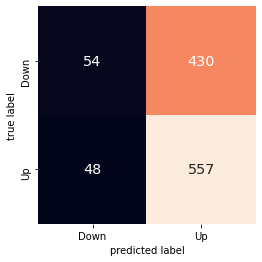

In [168]:
#Plotting Confusion matrix for full model#
fig, ax = plt.subplots()
sns.heatmap(matrix_full, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");
ax.figure.savefig('fullmodel.png')

In [171]:
#Confusion matrix examination using PyCM#
from pycm import *
cm_full = ConfusionMatrix(matrix={"Class1": {"Class1": 54, "Class2":430}, "Class2": {"Class1": 48, "Class2": 557}}) 
# Create CM Directly
#Class1=True, Class2=Predicted
print(cm_full.ERR)

{'Class1': 0.43893480257116624, 'Class2': 0.43893480257116624}


In [97]:
#overall fraction of correct predictions
#Accuracy of Model#
cm_full.ACC

{'Class1': 0.5610651974288338, 'Class2': 0.5610651974288338}

In [98]:
#TPR(Sensitivity, recall, hit rate, or true positive rate)# 
cm_full.TPR

{'Class1': 0.1115702479338843, 'Class2': 0.9206611570247933}

In [99]:
#TNR(Specificity or true negative rate)# 
cm_full.TNR

{'Class1': 0.9206611570247933, 'Class2': 0.1115702479338843}

In [100]:
#PPV(Precision or positive predictive value)#
cm_full.PPV

{'Class1': 0.5294117647058824, 'Class2': 0.5643363728470111}

##ONE PREDICTOR MODEL##

In [174]:
#One Predictor model Logistic Regression using pinguoin#
logit_one = pg.logistic_regression(weekly['Lag2'], endog)
logit_one.round(4)
print(logit_one.round(4).to_latex(index=True))

\begin{tabular}{llrrrrrr}
\toprule
{} &      names &    coef &      se &       z &    pval &  CI[2.5\%] &  CI[97.5\%] \\
\midrule
0 &  Intercept &  0.2147 &  0.0612 &  3.5072 &  0.0005 &    0.0947 &     0.3347 \\
1 &       Lag2 &  0.0628 &  0.0264 &  2.3818 &  0.0172 &    0.0111 &     0.1145 \\
\bottomrule
\end{tabular}



In [80]:
#Statsmodel library with one model#
#use of Statsmodels for Confusion Matrix#
logit_stat_one = sm.Logit(endog, sm.add_constant(weekly['Lag2']))
logit_stat_res_one = logit_stat_one.fit()
print(logit_stat_res_one.summary())

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                0.003866
Time:                        00:35:14   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.

In [83]:
#Confusion matrix calculation#
matrix_one = pd.DataFrame(logit_stat_res_one.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])

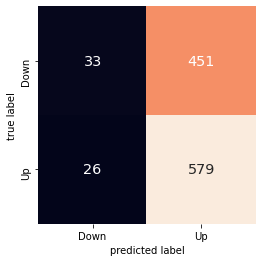

In [88]:
#Plotting Confusion matrix#
fig, ax = plt.subplots()
sns.heatmap(matrix_one, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [172]:
#Confusion matrix examination using PyCM#
from pycm import *
cm_one = ConfusionMatrix(matrix={"Class1": {"Class1": 33, "Class2":451}, "Class2": {"Class1": 26, "Class2": 579}}) 
# Create CM Directly
#Class1=True, Class2=Predicted
print(cm_one.ERR)

{'Class1': 0.4380165289256198, 'Class2': 0.4380165289256198}


In [104]:
#overall fraction of correct predictions
#Accuracy of Model#
cm_one.ACC

{'Class1': 0.5619834710743802, 'Class2': 0.5619834710743802}

In [105]:
#TPR(Sensitivity, recall, hit rate, or true positive rate)# 
cm_one.TPR

{'Class1': 0.06818181818181818, 'Class2': 0.9570247933884297}

In [106]:
#TNR(Specificity or true negative rate)# 
cm_one.TNR

{'Class1': 0.9570247933884297, 'Class2': 0.06818181818181818}

In [107]:
#PPV(Precision or positive predictive value)#
cm_one.PPV

{'Class1': 0.559322033898305, 'Class2': 0.5621359223300971}

##INTERACTION MODEL##

In [175]:
#Interactions model Logistic Regression using pinguoin#
logit_int = pg.logistic_regression(weekly['Lag1'] * weekly['Lag2'], endog)
logit_int.round(4)
print(logit_int.round(4).to_latex(index=True))

\begin{tabular}{llrrrrrr}
\toprule
{} &      names &    coef &      se &       z &    pval &  CI[2.5\%] &  CI[97.5\%] \\
\midrule
0 &  Intercept &  0.2257 &  0.0611 &  3.6954 &  0.0002 &    0.1060 &     0.3454 \\
1 &       None &  0.0060 &  0.0063 &  0.9519 &  0.3411 &   -0.0063 &     0.0183 \\
\bottomrule
\end{tabular}



In [111]:
#Statsmodel library with one model#
#use of Statsmodels for Confusion Matrix#
logit_stat_int = sm.Logit(endog, sm.add_constant(weekly['Lag1'] * weekly['Lag2']))
logit_stat_res_int = logit_stat_int.fit()
print(logit_stat_res_int.summary())

Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:               0.0006313
Time:                        01:17:46   Log-Likelihood:                -747.63
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.3311
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.061      3.695      0.000       0.106       0.345
0              0.0060      0.

In [112]:
#Confusion matrix calculation#
matrix_int = pd.DataFrame(logit_stat_res_int.pred_table(), columns = ["Down", "Up"], index = ["Down", "Up"])

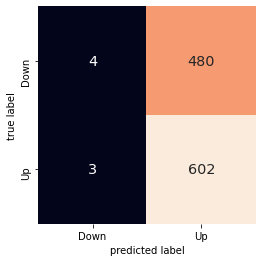

In [113]:
#Plotting Confusion matrix#
fig, ax = plt.subplots()
sns.heatmap(matrix_int, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

In [173]:
#Confusion matrix examination using PyCM#
from pycm import *
cm_int = ConfusionMatrix(matrix={"Class1": {"Class1": 4, "Class2":480}, "Class2": {"Class1": 3, "Class2": 603}}) 
# Create CM Directly
#Class1=True, Class2=Predicted
print(cm_int.ERR)

{'Class1': 0.4431192660550459, 'Class2': 0.4431192660550459}


In [116]:
#overall fraction of correct predictions
#Accuracy of Model#
cm_int.ACC

{'Class1': 0.5568807339449541, 'Class2': 0.5568807339449541}

In [117]:
#TPR(Sensitivity, recall, hit rate, or true positive rate)# 
cm_int.TPR

{'Class1': 0.008264462809917356, 'Class2': 0.995049504950495}

In [118]:
#TNR(Specificity or true negative rate)# 
cm_int.TNR

{'Class1': 0.995049504950495, 'Class2': 0.008264462809917356}

In [119]:
#PPV(Precision or positive predictive value)#
cm_int.PPV

{'Class1': 0.5714285714285714, 'Class2': 0.556786703601108}